In [254]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split

In [565]:
data = pd.read_csv('train.csv')

In [504]:
data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [505]:
data.shape

(10000, 20)

In [506]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [507]:
data = data.loc[data['Rooms'] < 10, :]
data = data.loc[data['Square'].between(10, 100), :]
data = data.loc[data['Price'].between(30000, 600000), :]

In [508]:
data.shape

(9716, 20)

In [509]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print (categorical_columns)
print (numerical_columns)

['Ecology_2', 'Ecology_3', 'Shops_2']
['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Price']


In [510]:
data[numerical_columns].describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,9716.000000,9716.000000,9716.000000,9716.000000,7674.000000,9716.000000,9716.000000,9716.000000,9.716000e+03,9716.000000,9716.000000,9716.000000,9716.000000,5060.000000,9716.000000,9716.000000,9716.000000
mean,8382.943495,50.237958,1.854570,54.537029,35.968208,6.194319,8.493413,12.603643,4.048500e+03,0.119795,24.798786,5372.834294,7.939893,1141.565217,1.316385,4.227357,209643.403038
std,4863.070498,43.541004,0.784139,15.844187,86.568528,28.879730,5.173695,6.643024,2.034095e+05,0.119457,17.540177,4009.048833,23.592289,1017.615963,1.483255,4.790868,86554.969496
min,2.000000,0.000000,0.000000,13.784865,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4159.750000,19.000000,1.000000,41.624816,22.677181,1.000000,4.000000,9.000000,1.973000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,152674.196823
50%,8395.500000,35.000000,2.000000,51.750934,32.458071,6.000000,7.000000,13.000000,1.977000e+03,0.075779,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,190240.870633
75%,12601.250000,75.000000,2.000000,64.875437,44.334031,9.000000,12.000000,17.000000,2.000000e+03,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.000000,6.000000,245134.612126
max,16798.000000,209.000000,6.000000,99.893009,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,598541.346385


In [511]:
for c in numerical_columns:
    print (data[c].unique())

[14038 15053  4765 ...  5123  5400  6306]
[ 35  41  53  58  99  59 154  74   1  23  28  31  13  57  27  85  34  48
 150  11  50  61  44  90 200  43 177 101  21 103  98 170  94   5  88  47
   6  52  62  77  79   9 156  69 108  96 169  18 128  10 144 120  39   7
  84 123 159  70 129   3  95  78  45  15 121  49  25  19   2 127  56 109
  46  17 119  80  86  83 137  91  92 118 187  54  36 106 161  22  63 167
 113  66  29  37  20   8 181  40  93  30  81 107 130 100  12 125  67  26
  89  24 111 138  64 124 183  55 157 151  33  87 126 155 164 105 110 132
  71  73   0 189  75 122 163 141 115 139 143 201 165 190 193 174  60 114
 172 134 117 149 153 131 148 145  82  76 160  42  32 133 208 171 176 173
 147  97 142 195 180 196 112  72 175   4 186 146 191 192  14 199 136 162
 179 188 135 140 168  38  16  51 178 104  68 152 194 116 207 185  65 102
 166 182 202 184 205 209 158]
[2. 3. 1. 4. 5. 6. 0.]
[47.98156124 65.68363987 44.94795276 ... 47.93900767 43.60256155
 38.66664497]
[29.44275055 40.0495425

In [560]:
data[categorical_columns].describe()

,Ecology_2,Ecology_3,Shops_2
count,9716.000000,9716.000000,9716.000000
mean,0.009984,0.027789,0.081309
std,0.099423,0.164377,0.273323
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000


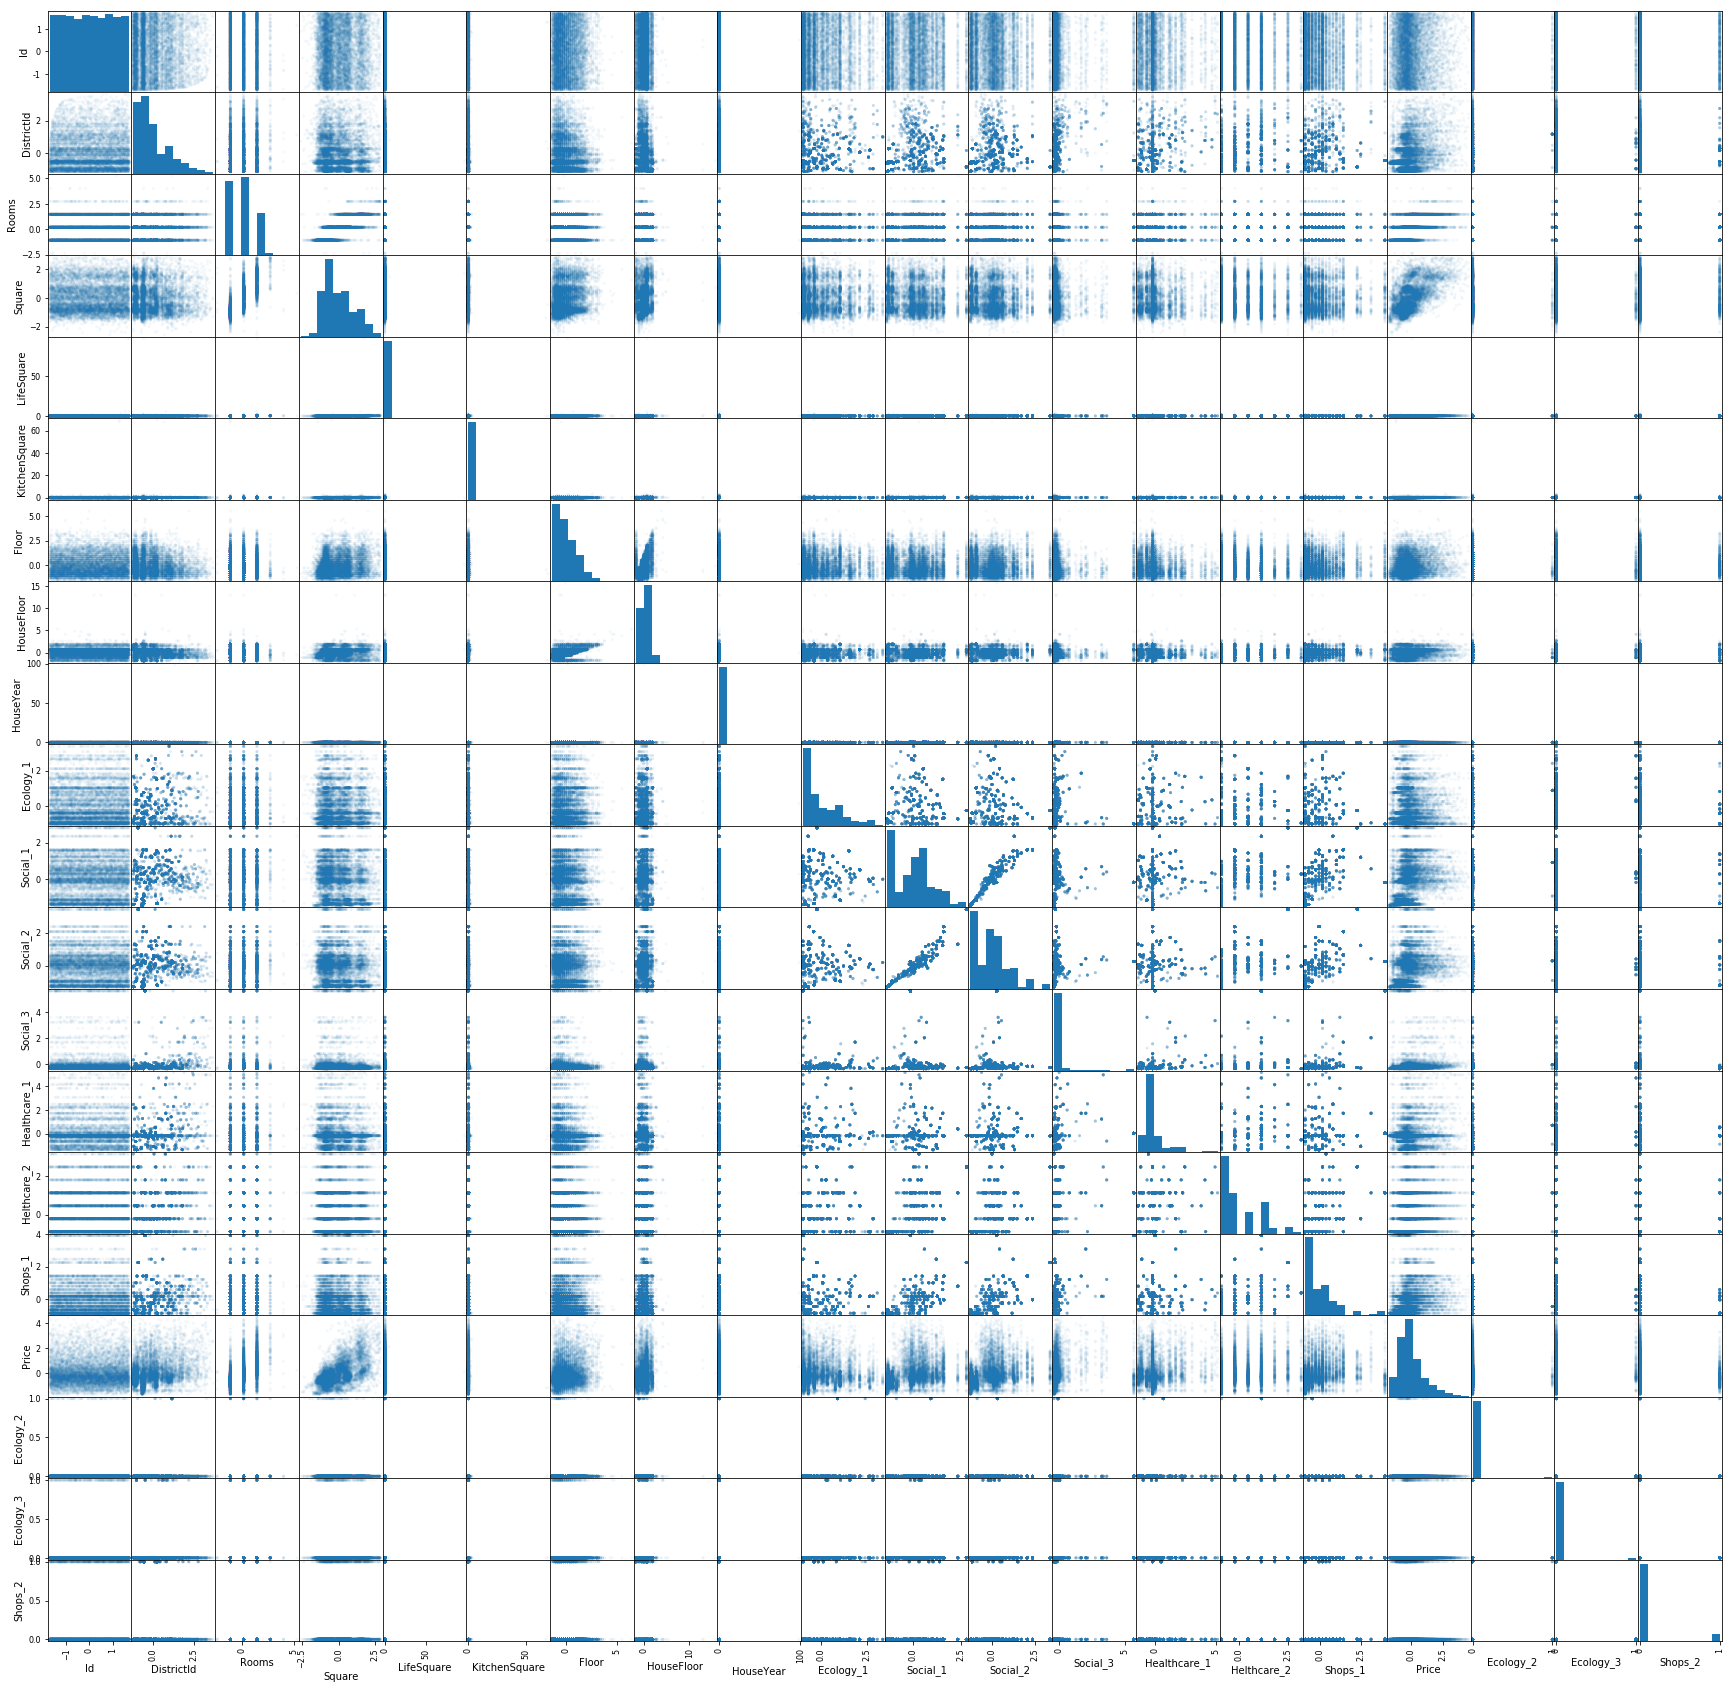

In [562]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha=0.05, figsize=(30, 30));

In [550]:
data.corr()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2,Ecology_3,Shops_2
Id,1.000000,0.012904,-0.002514,-0.005734,0.018074,0.019609,0.001105,-0.009705,0.005073,0.018365,-0.004344,-0.006371,-0.010644,-0.003143,0.002806,-0.011680,0.005669,-0.003132,0.006679,-0.002260
DistrictId,0.012904,1.000000,0.070494,-0.055088,-0.013567,0.039224,-0.123839,-0.154744,0.013678,0.067944,0.252344,0.172020,0.140032,0.273284,0.312132,0.177818,0.274818,0.095252,0.027912,0.022774
Rooms,-0.002514,0.070494,1.000000,0.800111,0.114126,-0.000611,-0.014026,-0.036024,-0.011063,-0.024748,0.086003,0.077928,0.012976,0.035970,0.066734,0.056177,0.560900,0.006743,0.007400,-0.005336
Square,-0.005734,-0.055088,0.800111,1.000000,0.130407,-0.003126,0.140707,0.116318,-0.011045,-0.055940,-0.072166,-0.040592,0.013177,-0.051839,-0.047627,0.011043,0.579050,-0.029084,-0.027326,0.054169
LifeSquare,0.018074,-0.013567,0.114126,0.130407,1.000000,-0.002075,0.015386,0.020934,-0.001973,-0.016997,-0.029356,-0.024934,-0.000004,-0.006151,-0.018406,-0.009096,0.067255,-0.004466,-0.006490,0.000511
KitchenSquare,0.019609,0.039224,-0.000611,-0.003126,-0.002075,1.000000,-0.011313,-0.001906,0.000989,-0.006760,0.042983,0.037191,-0.014952,0.008419,0.043572,0.010545,0.025237,0.000005,0.007275,0.018328
Floor,0.001105,-0.123839,-0.014026,0.140707,0.015386,-0.011313,1.000000,0.413592,0.001018,-0.015120,-0.054241,-0.023146,-0.001740,-0.106241,-0.077312,0.020627,0.120455,-0.050400,-0.023508,0.018358
HouseFloor,-0.009705,-0.154744,-0.036024,0.116318,0.020934,-0.001906,0.413592,1.000000,-0.000887,-0.007029,-0.035132,-0.004614,-0.011918,-0.105519,-0.082117,0.021170,0.086112,-0.061335,-0.012253,-0.041378
HouseYear,0.005073,0.013678,-0.011063,-0.011045,-0.001973,0.000989,0.001018,-0.000887,1.000000,0.001401,0.003004,0.001945,0.000882,-0.010426,0.011509,0.003755,0.005211,-0.001026,-0.001720,-0.003013
Ecology_1,0.018365,0.067944,-0.024748,-0.055940,-0.016997,-0.006760,-0.015120,-0.007029,0.001401,1.000000,0.022615,0.005787,-0.122646,-0.000013,0.033109,-0.077502,-0.050550,0.111154,0.224567,-0.080223


In [551]:
data.count(axis=0)

Id               9716
DistrictId       9716
Rooms            9716
Square           9716
LifeSquare       9716
KitchenSquare    9716
Floor            9716
HouseFloor       9716
HouseYear        9716
Ecology_1        9716
Social_1         9716
Social_2         9716
Social_3         9716
Healthcare_1     9716
Helthcare_2      9716
Shops_1          9716
Price            9716
Ecology_2        9716
Ecology_3        9716
Shops_2          9716
dtype: int64

In [552]:
data = data.fillna(data.median(axis=0), axis=0)

In [525]:
data_numerical = data[numerical_columns]
data_numerical = (data_numerical - data_numerical.mean()) / data_numerical.std()
data_numerical.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,9.716000e+03,9.716000e+03,9.716000e+03,9.716000e+03,9.716000e+03,9.716000e+03,9.716000e+03,9.716000e+03,9.716000e+03,9.716000e+03,9.716000e+03,9.716000e+03,9.716000e+03,9.716000e+03,9.716000e+03,9.716000e+03,9.716000e+03
mean,1.926550e-17,9.959555e-17,4.012160e-16,-6.787489e-18,2.341113e-16,-3.075481e-16,4.669541e-17,-3.846587e-16,-2.479267e-16,-5.891632e-17,-9.272522e-17,3.034088e-17,6.241862e-16,-8.471792e-17,1.026613e-15,1.127363e-16,-1.999824e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.723385e+00,-1.153808e+00,-2.365102e+00,-2.572058e+00,-4.530326e-01,-2.144867e-01,-1.448368e+00,-1.897275e+00,-1.051328e-02,-1.002829e+00,-1.413828e+00,-1.298272e+00,-3.365461e-01,-1.378424e+00,-8.874979e-01,-8.823780e-01,-1.738417e+00
25%,-8.684212e-01,-7.174377e-01,-1.089819e+00,-8.149496e-01,-1.330139e-01,-1.798604e-01,-8.685114e-01,-5.424704e-01,-1.020356e-02,-8.551018e-01,-1.071756e+00,-9.500593e-01,-3.365461e-01,-2.631125e-01,-8.874979e-01,-6.736476e-01,-6.581853e-01
50%,2.582012e-03,-3.499680e-01,1.854647e-01,-1.758433e-01,-3.602982e-02,-6.728548e-03,-2.886550e-01,5.966508e-02,-1.018389e-02,-3.684678e-01,1.147163e-02,-2.190901e-02,-2.517726e-01,-1.690501e-01,-2.133048e-01,-2.561867e-01,-2.241643e-01
75%,8.674163e-01,5.687063e-01,1.854647e-01,6.525048e-01,6.980041e-02,9.715054e-02,6.777723e-01,6.618005e-01,-1.007082e-02,6.360993e-01,6.386033e-01,4.774613e-01,-1.246125e-01,-1.451901e-02,4.608883e-01,3.700045e-01,4.100424e-01
max,1.730400e+00,3.646265e+00,5.286598e+00,2.862626e+00,9.675859e+01,6.952301e+01,6.476336e+00,1.571519e+01,9.855963e+01,3.365841e+00,2.805058e+00,3.419805e+00,5.639983e+00,5.137413e+00,3.157660e+00,3.918422e+00,4.493075e+00


In [526]:
data = pd.concat((data_numerical, data[binary_columns]), axis=1)
data = pd.DataFrame(data, dtype=float)
print (data.shape)
print (data.columns)

(9716, 20)
Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2',
       'Social_3', 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Price',
       'Ecology_2', 'Ecology_3', 'Shops_2'],
      dtype='object')


In [527]:
?train_test_split

In [528]:
fts = ['Square', 'Rooms', 'Floor','DistrictId', 'Rooms', 'Square', 
       'Floor', 'HouseFloor','Social_1']

In [529]:
lr = LinearRegression()

In [530]:
lr.fit(train.loc[:, fts], train['Price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [531]:
pred = lr.predict(train.loc[:, fts])

In [532]:
pred

array([-0.77687791,  1.62627101, -0.200107  , ...,  0.41006782,
        0.56642344,  0.65209736])

In [533]:
pred.shape

(7000,)

In [534]:
r2(train['Price'], pred)

0.47915721774643694

In [535]:
pred_valid = lr.predict(valid.loc[:, fts])

In [536]:
r2(valid['Price'], pred_valid)

0.4439757925665173

In [537]:
test = pd.read_csv('test.csv')

In [538]:
test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A


In [539]:
pred_test = lr.predict(test.loc[:, fts])

In [540]:
pred_test

array([35.7087766 , 44.34572324, 55.30309057, ..., 51.64855066,
       44.85508826, 36.23145792])

In [541]:
pred_test.shape

(5000,)

In [542]:
test['Price'] = pred_test

In [495]:
test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B,35.708777
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,44.345723
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B,55.303091
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B,46.318953
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A,26.856295


In [564]:
test.loc[:,['Id', 'Price']].to_csv('Reukova_predictions.csv', index = None)